Impact of the Number of Threads

2 4.107165336608887
6 1.8318514823913574
12 1.5957093238830566
20 1.674957275390625
24 3.3718838691711426


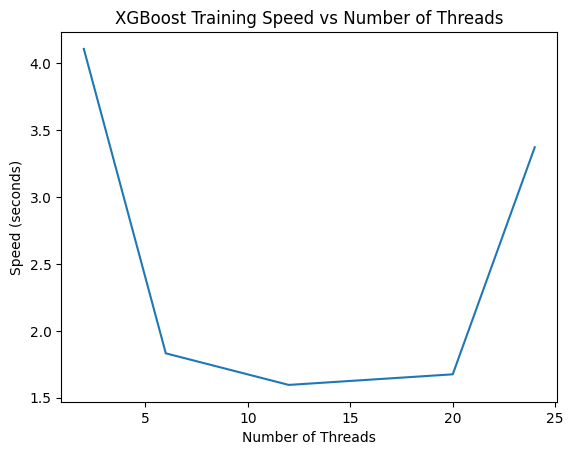

In [6]:
# Otto, tune number of threads
import pandas as pd
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
from time import time
from matplotlib import pyplot

# Load data
dataset = pd.read_csv('course-data/otto-train.csv')

# Split data into X and y
X = dataset.iloc[:, 0:94]
Y = dataset.iloc[:, 94]

# encode string class values as integers
label_encoded_y = LabelEncoder().fit_transform(Y)
# evaluate the effect of the number of threads
results = []
num_threads = [2, 6, 12, 20, 24]
for n in num_threads:
    start = time()
    model = XGBClassifier(nthread=n)
    model.fit(X, label_encoded_y)
    elapsed = time() - start
    print(n, elapsed)
    results.append(elapsed)
# plot results
pyplot.plot(num_threads, results)
pyplot.ylabel('Speed (seconds)')
pyplot.xlabel('Number of Threads')
pyplot.title('XGBoost Training Speed vs Number of Threads')
pyplot.show()

Notice the negative effect of going beyond the 12 physical cores.

Parallelism When Cross Validating XGBoost Models

In [7]:
# Otto, parallel cross validation
import pandas as pd
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
import time

# Load data
dataset = pd.read_csv('course-data/otto-train.csv')

# Split data into X and y
X = dataset.iloc[:, 0:94]
Y = dataset.iloc[:, 94]

# encode string class values as integers
label_encoded_y = LabelEncoder().fit_transform(Y)
# prepare cross validation
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
# Single Thread XGBoost, Parallel Thread CV
start = time.time()
model = XGBClassifier(nthread=1)
results = cross_val_score(model, X, label_encoded_y, cv=kfold, scoring='neg_log_loss',
                            n_jobs=-1)
elapsed = time.time() - start
print("Single Thread XGBoost, Parallel Thread CV: %f" % (elapsed))
# Parallel Thread XGBoost, Single Thread CV
start = time.time()
model = XGBClassifier(nthread=-1)
results = cross_val_score(model, X, label_encoded_y, cv=kfold, scoring='neg_log_loss',
                            n_jobs=1)
elapsed = time.time() - start
print("Parallel Thread XGBoost, Single Thread CV: %f" % (elapsed))
# Parallel Thread XGBoost and CV
start = time.time()
model = XGBClassifier(nthread=-1)
results = cross_val_score(model, X, label_encoded_y, cv=kfold, scoring='neg_log_loss',
                            n_jobs=-1)
elapsed = time.time() - start
print("Parallel Thread XGBoost and CV: %f" % (elapsed))


Single Thread XGBoost, Parallel Thread CV: 11.943277
Parallel Thread XGBoost, Single Thread CV: 33.960206
Parallel Thread XGBoost and CV: 10.517074
